In [29]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from collections import Counter
import matplotlib.pyplot as plt

In [30]:
face_data = fetch_lfw_people(min_faces_per_person=50)

In [31]:
X = face_data.data
Y = face_data.target

In [32]:
X.shape

(1560, 2914)

In [33]:
Y.shape

(1560,)

In [34]:
face_data.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [35]:
Counter(Y)

Counter({11: 144,
         4: 109,
         2: 121,
         3: 530,
         1: 236,
         0: 77,
         10: 52,
         8: 53,
         5: 71,
         7: 55,
         9: 60,
         6: 52})

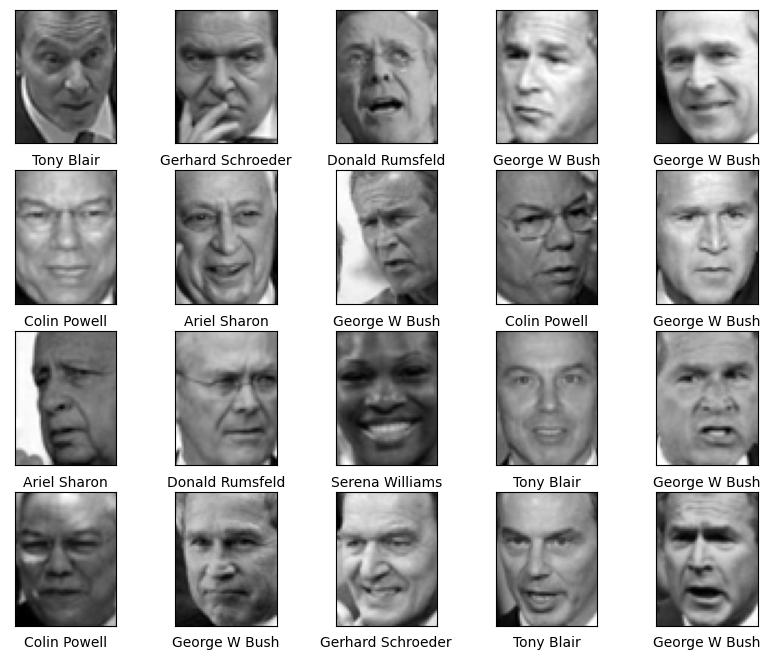

In [36]:
fig, axs = plt.subplots(4,5,figsize=(10,8))
for i, ax in enumerate(axs.flat):
    ax.imshow(face_data.images[i],cmap='gray')
    ax.set(xticks=[], yticks =[], xlabel=face_data.target_names[face_data.target[i]])
plt.show()

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [38]:
pca = PCA()
svc = SVC(class_weight='balanced')
clf = make_pipeline(pca,svc)

In [39]:
print(clf)

Pipeline(steps=[('pca', PCA()), ('svc', SVC(class_weight='balanced'))])


In [40]:
parameters_pipeline = {
    'pca__whiten' : [True, False],
    'pca__n_components': [None, 100],
    'svc__C': [10**x for x in range(-2,5)],
    'svc__gamma': [10**x for x in range(-4,1)],
    'svc__kernel' : ['rbf','linear']
}

In [41]:
grid_search = GridSearchCV(clf,parameters_pipeline,cv=5, verbose=10)
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'pca__n_components': [None, 100],
                         'pca__whiten': [True, False],
                         'svc__C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf', 'linear']},
             verbose=10)

In [42]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
[CV 1/5; 1/280] START pca__n_components=None, pca__whiten=True, svc__C=0.01, svc__gamma=0.0001, svc__kernel=rbf
[CV 1/5; 1/280] END pca__n_components=None, pca__whiten=True, svc__C=0.01, svc__gamma=0.0001, svc__kernel=rbf;, score=0.068 total time=   0.8s
[CV 2/5; 1/280] START pca__n_components=None, pca__whiten=True, svc__C=0.01, svc__gamma=0.0001, svc__kernel=rbf
[CV 2/5; 1/280] END pca__n_components=None, pca__whiten=True, svc__C=0.01, svc__gamma=0.0001, svc__kernel=rbf;, score=0.068 total time=   0.8s
[CV 3/5; 1/280] START pca__n_components=None, pca__whiten=True, svc__C=0.01, svc__gamma=0.0001, svc__kernel=rbf
[CV 3/5; 1/280] END pca__n_components=None, pca__whiten=True, svc__C=0.01, svc__gamma=0.0001, svc__kernel=rbf;, score=0.073 total time=   0.8s
[CV 4/5; 1/280] START pca__n_components=None, pca__whiten=True, svc__C=0.01, svc__gamma=0.0001, svc__kernel=rbf
[CV 4/5; 1/280] END pca__n_components=None, pca__whiten=Tru

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'pca__n_components': [None, 100],
                         'pca__whiten': [True, False],
                         'svc__C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf', 'linear']},
             verbose=10)

In [43]:
grid_search.best_params_

{'pca__n_components': None,
 'pca__whiten': False,
 'svc__C': 0.1,
 'svc__gamma': 0.0001,
 'svc__kernel': 'linear'}

In [44]:
best_clf = grid_search.best_estimator_
pred = best_clf.predict(X_test)
print(f'The accuracy is: {best_clf.score(X_test,Y_test)*100:.1f}%')

The accuracy is: 81.5%


In [45]:
print(classification_report(Y_test, pred,target_names=face_data.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.70      0.82      0.76        17
     Colin Powell       0.77      0.88      0.82        52
  Donald Rumsfeld       0.71      0.71      0.71        34
    George W Bush       0.88      0.92      0.90       134
Gerhard Schroeder       0.72      0.72      0.72        32
      Hugo Chavez       0.81      0.81      0.81        16
   Jacques Chirac       0.75      0.38      0.50         8
    Jean Chretien       0.88      0.54      0.67        13
    John Ashcroft       0.75      0.56      0.64        16
Junichiro Koizumi       1.00      0.93      0.97        15
  Serena Williams       0.93      0.93      0.93        14
       Tony Blair       0.78      0.74      0.76        39

         accuracy                           0.82       390
        macro avg       0.81      0.75      0.77       390
     weighted avg       0.82      0.82      0.81       390

